### Google drive mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### imports

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from matplotlib.patches import Rectangle
from google.colab.patches import cv2_imshow

# loading data from drive  
Data was downloaded to my google drive from waymo:  
'drive/MyDrive/object_detection/data/camera1_box.parquet'  
'drive/MyDrive/object_detection/data/waymo_camera_image/*'

In [5]:
# box_df contains just the labels
box_df = pd.read_parquet('drive/MyDrive/object_detection/data/camera1_box.parquet').drop_duplicates()
# img_df contains the jpg images in the current image folder
img_df = pd.read_parquet('drive/MyDrive/object_detection/data/waymo_camera_image/camera1_data_part1.parquet').drop_duplicates()
box_cols = ['segment', 'frame_timestamp','camera_object_id',
            'box_center_x', 'box_center_y', 'box_size_x', 'box_size_y', 'type']
img_cols = ['image']
# merging box labels and images, each row in df contains one box label and the corresponding image
df = box_df[box_cols].join(img_df[img_cols])
df = df.loc[df.image.notna()].drop_duplicates()

In [ ]:
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 224023 entries, 10017090168044687777_6380_000_6400_000;1550083467346370 to 10963653239323173269_1924_000_1944_000;1509039302223414
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   segment           224023 non-null  object 
 1   frame_timestamp   224023 non-null  int64  
 2   camera_object_id  224023 non-null  object 
 3   box_center_x      224023 non-null  float64
 4   box_center_y      224023 non-null  float64
 5   box_size_x        224023 non-null  float64
 6   box_size_y        224023 non-null  float64
 7   type              224023 non-null  int64  
 8   image             224023 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 17.1+ MB


None

segment  \
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   
10017090168044687777_6380_000_6400_000;15500834...  10017090168044687777_6380_000_6400_000   

                                                     frame_timestamp  \
10017090168044687777_6380_000_6400_000;15500834...  1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...  1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...  1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...  1550083467346370   
10017090168044687777_6380_000_6400_000;15500834...  1550083467346370   

                                                                        camera_object_id  \
10017090168044687777_6380_000_6400_000;15500834...  12ba81ee-9cee-4134-94ca-df9ed01e0ff1   
10017090168044687777_6380_000_6400_000;15500834...  2ab9ff55-a510-435b-a729-884444e67249   
10017090168044687777_6380_000_6400_000;15500834...  470e3826-ecd2-425c-80ca-33f3d8c876a6   
10017090168044687777_6380_000_6400_000;15500834...  98fcf17a-d19e-4c3b-bbc0-54ae2d1fcc15   
10017090168044687777_6380_000_6400_000;15500834...  fb06fe05-95ee-43dc-801c-7855e4fbd7f1   

                                                    box_center_x  \
10017090168044687777_6380_000_6400_000;15500834...    1466.55198   
10017090168044687777_6380_000_6400_000;15500834...    1109.07204   
10017090168044687777_6380_000_6400_000;15500834...    1181.70489   
10017090168044687777_6380_000_6400_000;15500834...    1006.12287   
10017090168044687777_6380_000_6400_000;15500834...    1380.02415   

                                                    box_center_y  box_size_x  \
10017090168044687777_6380_000_6400_000;15500834...     492.64020   240.63579   
10017090168044687777_6380_000_6400_000;15500834...     536.85150   178.73997   
10017090168044687777_6380_000_6400_000;15500834...     519.16698    61.89582   
10017090168044687777_6380_000_6400_000;15500834...     486.95589    28.42155   
10017090168044687777_6380_000_6400_000;15500834...     603.80004   361.26948   

                                                    box_size_y  type  \
10017090168044687777_6380_000_6400_000;15500834...   109.89666     1   
10017090168044687777_6380_000_6400_000;15500834...   156.00273     1   
10017090168044687777_6380_000_6400_000;15500834...    95.37009     1   
10017090168044687777_6380_000_6400_000;15500834...    39.15858     1   
10017090168044687777_6380_000_6400_000;15500834...   127.58118     1   

                                                                                                image  
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...  
10017090168044687777_6380_000_6400_000;15500834...  b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...

# Example ground truths

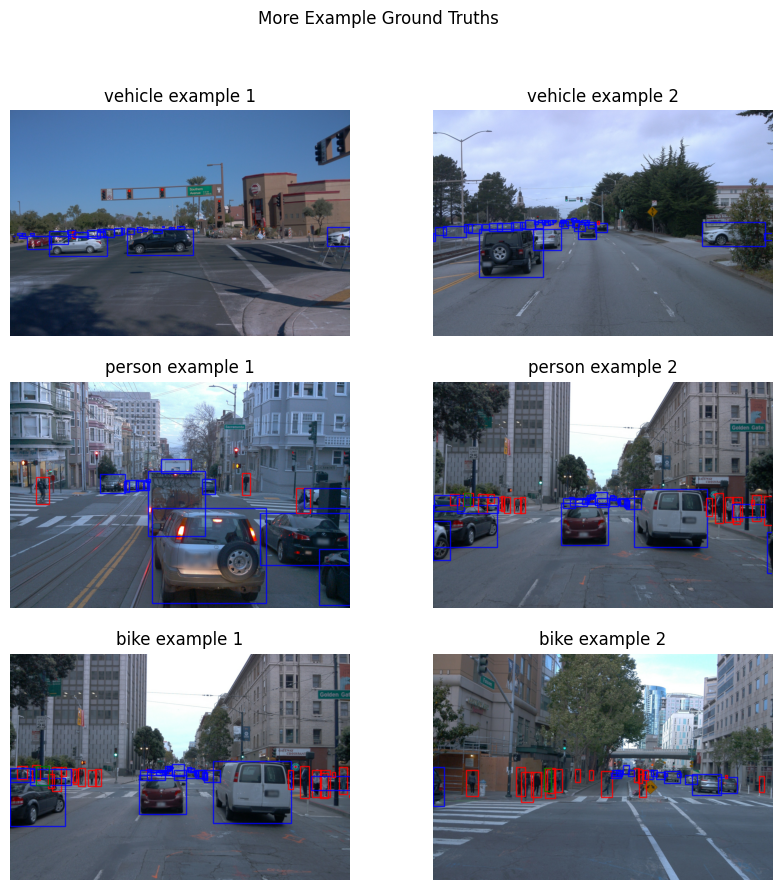

In [ ]:
c_map = {1:'b',2:'r',4:'g'}
type_map = {1:'vehicle', 2:'person', 4:'bike'}
def show_camera_image(data, layout):
    """Display the given camera with box."""
    r,c,plot_index = layout
    ax = plt.subplot(r,c,plot_index+1)
    plt.imshow(tf.image.decode_jpeg(data.image))
    this_frame = df.loc[data.name]
    if type(this_frame) == pd.Series: 
        this_frame = pd.DataFrame(this_frame).transpose()
    for i in range(this_frame.shape[0]):
        this_data = this_frame.iloc[i]
        lower_left_x = this_data.box_center_x - (this_data.box_size_x // 2)
        lower_left_y = this_data.box_center_y - (this_data.box_size_y // 2)
        box = Rectangle((lower_left_x, lower_left_y), 
                                this_data.box_size_x, 
                                this_data.box_size_y)
        box.set(fill=False,edgecolor=c_map[this_data.type], alpha=0.8)
        ax.add_patch(box)
    plt.grid(False)
    plt.axis('off')
    plt.title(f'{type_map[data.type]} example {plot_index%2+1}')
    return ax

plt.figure(figsize=(10,10))
plt.suptitle('More Example Ground Truths')

example_imgs = []
for i, t in enumerate(df.type.unique()):
    # get random image containing type t object
    example_imgs.append(
        df.loc[df.type == t]
        .sample(random_state=42).iloc[0]
    )
    # get random image containing type t object, from another segment
    example_imgs.append(
        df.loc[(df.type == t) & (df.segment != example_imgs[-1].segment)]
        .sample(random_state=42)
        .iloc[0]
    )

for i, img in enumerate(example_imgs):
    # get random image containing type t object
    show_more_camera_image(img, [3,2,i])

plt.show()

# bike Example Ground Truths

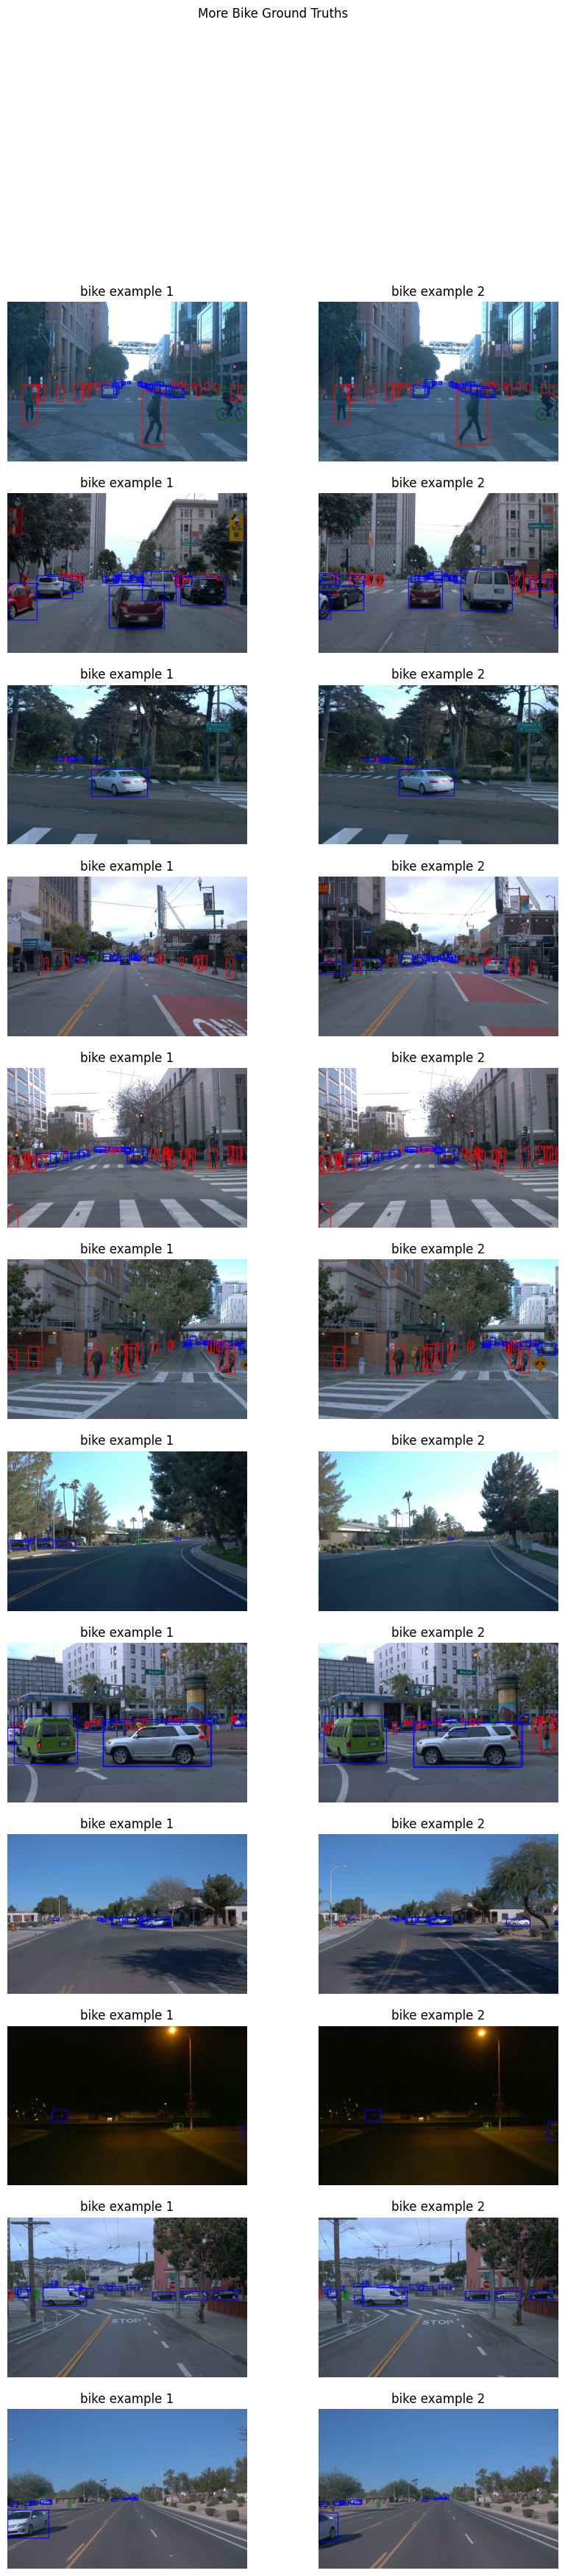

In [4]:
plt.figure(figsize=(10,40))
plt.suptitle('More Bike Ground Truths')

bike_imgs = []
t = 4 # bike type code
bike_df = df.loc[df.type == t]
for seg in bike_df.segment.unique():
    # get random image containing type t object
    bike_imgs.append(
        df.loc[((df.type == t) &
                (df.segment == seg)
        )]
        .sample(random_state=42)
        .iloc[0]
    )
    # get random image containing type t object, from same segment but another frame
    bike_imgs.append(
        df.loc[(
            (df.type == t) & 
            (df.segment == seg) &
            (df.frame_timestamp != bike_imgs[-1].frame_timestamp)
        )]
        .sample(random_state=42)
        .iloc[0]
    )

num_segments = len(bike_df.segment.unique())
for i, img in enumerate(bike_imgs):
    # get random image containing type t object
    show_camera_image(img, [num_segments,2,i])

print('num_segments:',num_segments)
plt.savefig('data/bike_examples.png')

display(Image('data/bike_examples.png'))

# Average label distribution

count    9704.000000
mean       18.980833
std        12.327843
min         1.000000
25%        10.000000
50%        17.000000
75%        27.000000
max        67.000000
Name: segment, dtype: float64

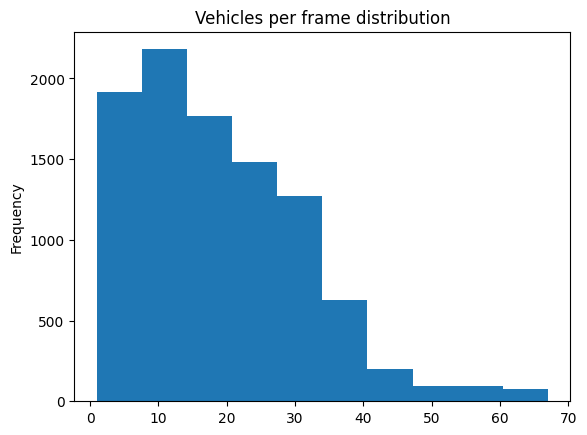

In [15]:
# Vehicles
vehicles_counts = df.loc[df.type==1].groupby('frame_timestamp').count()['segment']
display(vehicles_counts.describe())
vehicles_counts.plot(kind='hist')
plt.title('Vehicles per frame distribution')
plt.show()

count    5173.000000
mean        7.535279
std         8.123977
min         1.000000
25%         2.000000
50%         4.000000
75%        11.000000
max        40.000000
Name: segment, dtype: float64

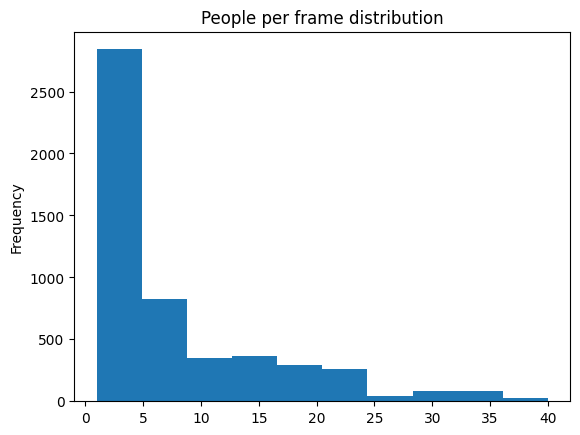

In [17]:
# People
people_counts = df.loc[df.type==2].groupby('frame_timestamp').count()['segment']
display(people_counts.describe())
people_counts.plot(kind='hist')
plt.title('People per frame distribution')
plt.show()

### Downloading pretrained Yolov7 from repository

In [ ]:
# download yolov7 pretrained model repo to folder ./yolov7
!git clone https://github.com/WongKinYiu/yolov7

%cd ./yolov7
# install Requirements
%pip install -r requirements.txt 

# download yolov7 starting weights checkpoint
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

# Yolo format Files
Since loading the data in all at once crashes my RAM, I will iteratively create yolo formatted files in seperate folders.  
  
Yolo formatted data will be saved into:
yolov7/data/train01/images  
yolov7/data/train01/labels  
  
yolov7/data/train23/images  
yolov7/data/train23/labels  
  
yolov7/data/train45/images  
yolov7/data/train45/labels  
  
yolov7/data/train67/images  
yolov7/data/train67/labels  
  
yolov7/data/train89/images  
yolov7/data/train89/labels  
  
yolov7/data/val/images  
yolov7/data/val/labels  
  
yolov7/data/test/images  
yolov7/data/test/labels  


In [ ]:
# jupyter variables to keep, rest will be deleted with del var
keep_vars = set(dir())

# box_df contains just the labels
box_df = pd.read_parquet('drive/MyDrive/object_detection/data/camera1_box.parquet').drop_duplicates()
box_df = box_df.loc[box_df.type != 4]
box_df['type'] = box_df.type - 1
box_cols = ['segment', 'frame_timestamp','camera_object_id',
            'box_center_x', 'box_center_y', 'box_size_x', 'box_size_y', 'type']

# # Define folder path to images
folder_path = 'drive/MyDrive/object_detection/data/waymo_camera_image/'

# # TRAIN
print("TRAIN")
# # Loop through files in folder 0-9 for train data
for file in os.listdir(folder_path)[:9]:
    print("\n",file)

    # img_df contains the jpg images in the current image folder
    img_df = pd.read_parquet(folder_path + file).drop_duplicates()
    img_cols = ['image']
    # merging box labels and images, each row in df contains one box label and the corresponding image
    df = box_df[box_cols].join(img_df[img_cols])
    df = df.loc[df.image.notna()].drop_duplicates()

    with BytesIO(df.iloc[0].image) as f:
        with Image.open(f) as img:
            # Get the size of the image in pixels
            WIDTH, HEIGHT = img.size

    # working imgs -> ~200 sampled frames (~10 Hertz) from each segment <= 2500 images
    seg_dfs = [df.loc[df.segment == seg] for seg in df.segment.unique()]
    imgs = [[seg_df.iloc[i] for i in np.arange(0,seg_df.shape[0],100)] for seg_df in seg_dfs]
    del seg_dfs
    imgs = [img for seg in imgs for img in seg]

    # write images to jpg files in data/train/images
    images_folder_path = '/content/drive/MyDrive/yolov7/data/train/images_1011/'
    for img in imgs:
        file_path = ''.join([images_folder_path,img.name,'.jpg'])
        with open(file_path, "wb") as f:
            f.write(img.image)

    # write labels to txt files in data/train/labels
    labels_folder_path = '/content/drive/MyDrive/yolov7/data/train/labels_1011/'
    for img in imgs:
        file_path = ''.join([labels_folder_path,img.name,'.txt'])
        with open(file_path, "w") as f:
            frame_df = df.loc[img.name]
            frame_df['box_center_x'] = frame_df['box_center_x'] / WIDTH
            frame_df['box_size_x'] = frame_df['box_size_x'] / WIDTH
            frame_df['box_center_y'] = frame_df['box_center_y'] / HEIGHT
            frame_df['box_size_y'] = frame_df['box_size_y'] / HEIGHT
            if type(frame_df) == pd.Series:
                frame_df = pd.DataFrame(frame_df).transpose()
            for i in range(frame_df.shape[0]):
                box = frame_df.iloc[i]
                buf = ' '.join([str(box.type), 
                                str(box.box_center_x),
                                str(box.box_center_y),
                                str(box.box_size_x),
                                str(box.box_size_y),
                                '\n'])
                f.write(buf)
    print(f'Wrote/updated {len(imgs)} images to {images_folder_path}')
    print(f'Wrote/updated labels for {len(imgs)} images to {labels_folder_path}\n')

    print('created variables: ', list(set(dir()) - keep_vars))   
    print('RAM memory % used before del:', psutil.virtual_memory()[2])
    del df, imgs, frame_df, box, buf
    print('RAM memory % used: after del', psutil.virtual_memory()[2])

# VALIDATION
print("VALIDATION")
# Loop through files in folder 13-15 for train data
for file in os.listdir(folder_path)[13:15]:
    print("\n",file)
    img_df = pd.read_parquet(folder_path + file).drop_duplicates()
    img_cols = ['image']
    df = box_df[box_cols].join(img_df[img_cols])
    df = df.loc[df.image.notna()].drop_duplicates()

    with BytesIO(df.iloc[0].image) as f:
        with Image.open(f) as img:
            # Get the size of the image in pixels
            WIDTH, HEIGHT = img.size

    # working imgs -> ~200 sampled frames (~10 Hertz) from each segment <= 2500 images
    seg_dfs = [df.loc[df.segment == seg] for seg in df.segment.unique()]
    imgs = [[seg_df.iloc[i] for i in np.arange(0,seg_df.shape[0],100)] for seg_df in seg_dfs]
    del seg_dfs
    imgs = [img for seg in imgs for img in seg]

    # write images to jpg files in data/train/images
    images_folder_path = '/content/drive/MyDrive/yolov7/data/val/images/'
    for img in imgs:
        file_path = ''.join([images_folder_path,img.name,'.jpg'])
        with open(file_path, "wb") as f:
            f.write(img.image)

    # write labels to txt files in data/train/labels
    labels_folder_path = '/content/drive/MyDrive/yolov7/data/val/labels/'
    for img in imgs:
        file_path = ''.join([labels_folder_path,img.name,'.txt'])
        with open(file_path, "w") as f:
            frame_df = df.loc[img.name]
            frame_df['box_center_x'] = frame_df['box_center_x'] / WIDTH
            frame_df['box_size_x'] = frame_df['box_size_x'] / WIDTH
            frame_df['box_center_y'] = frame_df['box_center_y'] / HEIGHT
            frame_df['box_size_y'] = frame_df['box_size_y'] / HEIGHT
            if type(frame_df) == pd.Series:
                frame_df = pd.DataFrame(frame_df).transpose()
            for i in range(frame_df.shape[0]):
                box = frame_df.iloc[i]
                buf = ' '.join([str(box.type), 
                                str(box.box_center_x),
                                str(box.box_center_y),
                                str(box.box_size_x),
                                str(box.box_size_y),
                                '\n'])
                f.write(buf)

    print(f'Wrote/updated {len(imgs)} images to {images_folder_path}')
    print(f'Wrote/updated labels for {len(imgs)} images to {labels_folder_path}\n')
    del df, imgs, frame_df, box, buf

#TEST
# Loop through files in folder [16] for train data
print("TEST")
for file in os.listdir(folder_path)[15:]:
    print("\n",file)
    img_df = pd.read_parquet(folder_path + file).drop_duplicates()
    img_cols = ['image']
    df = box_df[box_cols].join(img_df[img_cols])
    df = df.loc[df.image.notna()].drop_duplicates()

    with BytesIO(df.iloc[0].image) as f:
        with Image.open(f) as img:
            # Get the size of the image in pixels
            WIDTH, HEIGHT = img.size

    # working imgs -> ~200 sampled frames (~10 Hertz) from each segment <= 2500 images
    seg_dfs = [df.loc[df.segment == seg] for seg in df.segment.unique()]
    imgs = [[seg_df.iloc[i] for i in np.arange(0,seg_df.shape[0],100)] for seg_df in seg_dfs]
    seg_dfs=None
    imgs = [img for seg in imgs for img in seg]
    print('num_imgs:",len(imgs))

    # write images to jpg files in data/train/images
    images_folder_path = '/content/drive/MyDrive/yolov7/data/test/images/'
    for img in imgs:
        file_path = ''.join([images_folder_path,img.name,'.jpg'])
        with open(file_path, "wb") as f:
            f.write(img.image)

    # write labels to txt files in data/train/labels
    labels_folder_path = '/content/drive/MyDrive/yolov7/data/test/labels/'
    for img in imgs:
        file_path = ''.join([labels_folder_path,img.name,'.txt'])
        with open(file_path, "w") as f:
            frame_df = df.loc[img.name]
            frame_df['box_center_x'] = frame_df['box_center_x'] / WIDTH
            frame_df['box_size_x'] = frame_df['box_size_x'] / WIDTH
            frame_df['box_center_y'] = frame_df['box_center_y'] / HEIGHT
            frame_df['box_size_y'] = frame_df['box_size_y'] / HEIGHT
            if type(frame_df) == pd.Series:
                frame_df = pd.DataFrame(frame_df).transpose()
            for i in range(frame_df.shape[0]):
                box = frame_df.iloc[i]
                buf = ' '.join([str(box.type), 
                                str(box.box_center_x),
                                str(box.box_center_y),
                                str(box.box_size_x),
                                str(box.box_size_y),
                                '\n'])
                f.write(buf)

    print(f'Wrote/updated {len(imgs)} images to {images_folder_path}')
    print(f'Wrote/updated labels for {len(imgs)} images to {labels_folder_path}\n')
    imgs=None


TRAIN

 camera1_data_part12.parquet
Wrote/updated 2297 images to /content/drive/MyDrive/yolov7/data/train/images_1011/
Wrote/updated labels for 2297 images to /content/drive/MyDrive/yolov7/data/train/labels_1011/

created variables:  ['box_df', 'file_path', 'labels_folder_path', 'buf', 'HEIGHT', 'img', 'img_cols', 'WIDTH', 'f', 'frame_df', 'box', 'box_cols', 'keep_vars', 'folder_path', 'i', 'images_folder_path', 'imgs', 'df', 'file', 'img_df', '__warningregistry__']
RAM memory % used before del: 21.3
RAM memory % used: after del 21.3

 camera1_data_part13.parquet
Wrote/updated 2388 images to /content/drive/MyDrive/yolov7/data/train/images_1011/
Wrote/updated labels for 2388 images to /content/drive/MyDrive/yolov7/data/train/labels_1011/

created variables:  ['box_df', 'file_path', 'labels_folder_path', 'buf', 'HEIGHT', 'img', 'img_cols', 'WIDTH', 'f', 'frame_df', 'box', 'box_cols', 'keep_vars', 'folder_path', 'i', 'images_folder_path', 'imgs', 'df', 'file', 'img_df', '__warningregistry